In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [2]:
profitable = pd.read_csv('profitable.csv',index_col = 0)

In [3]:
profitable.head()

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class,Equity vs Total liabilities,Altman score
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1,0.249760,497.42,0,1.330505,3.780653
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1,0.258340,677.96,0,0.995999,3.716421
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1,0.309060,794.16,0,0.436947,2.911622
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1,0.092704,917.01,0,1.866109,3.243069
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1,0.187320,1133.20,1,0.630710,2.690250


In [4]:
profitable.shape

(43114, 18)

In [5]:
profitable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43114 entries, 0 to 43260
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Industry type                                       43114 non-null  object 
 1   Total liabilities vs Total Assets                   43114 non-null  float64
 2   Working Capital vs total assets                     43114 non-null  float64
 3   Current Assets vs short-term liabilities            43114 non-null  float64
 4   Distance from airport                               43114 non-null  int64  
 5   Retained earning vs total assets                    43114 non-null  float64
 6   Employee strength                                   43114 non-null  int64  
 7   MNC or not                                          43114 non-null  int64  
 8   Sales vs total assets                               43114 non-null  float64
 9   

In [6]:
profitable.nunique()

Industry type                                             3
Total liabilities vs Total Assets                     34598
Working Capital vs total assets                       36488
Current Assets vs short-term liabilities              30049
Distance from airport                                     2
Retained earning vs total assets                      23379
Employee strength                                         2
MNC or not                                                2
Sales vs total assets                                 24187
Equity vs total assets                                34599
Location                                                  2
Distances from water source                               2
powered by green energy                                   2
gf and interest vs total assets                       36870
total liabilities vs gross profit and depriciation    37258
class                                                     2
Equity vs Total liabilities             

__Observations__
* From above we can observe that Industry type is categorical but identified as object
* Distance from airport,Employee strength, MNC or not,Location,Distances from water source,poweredby green energy,class should be categorical intsead of int64


### Data Pre-processing

* __Data type conversion__

    Using astype('category') to convert Industry type,Distance from airport,Employee strength, MNC or not,Location,Distances from water source,poweredby green energy,class attributes to categorical attributes.

In [7]:
profitable.columns

Index(['Industry type', 'Total liabilities vs Total Assets',
       'Working Capital vs total assets',
       'Current Assets vs short-term liabilities', 'Distance from airport',
       'Retained earning vs total assets', 'Employee strength', 'MNC or not',
       'Sales vs total assets', 'Equity vs total assets', 'Location',
       'Distances from water source', 'powered by green energy',
       'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation', 'class',
       'Equity vs Total liabilities', 'Altman score'],
      dtype='object')

In [8]:
for col in ['Industry type', 'Distance from airport',
        'Employee strength', 'MNC or not', 'Location',
       'Distances from water source', 'powered by green energy', 'class']:
    profitable[col] = profitable[col].astype('category')

In [9]:
print(profitable.dtypes)

Industry type                                         category
Total liabilities vs Total Assets                      float64
Working Capital vs total assets                        float64
Current Assets vs short-term liabilities               float64
Distance from airport                                 category
Retained earning vs total assets                       float64
Employee strength                                     category
MNC or not                                            category
Sales vs total assets                                  float64
Equity vs total assets                                 float64
Location                                              category
Distances from water source                           category
powered by green energy                               category
gf and interest vs total assets                        float64
total liabilities vs gross profit and depriciation     float64
class                                                 c

In [10]:
profitable.describe(include = 'all')

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class,Equity vs Total liabilities,Altman score
count,43114,43114.000000,43114.000000,43114.000000,43114.0,43114.000000,43114.0,43114.0,43114.000000,43114.000000,43114.0,43114.0,43114.0,43114.000000,43114.000000,43114.0,43114.000000,43114.000000
unique,3,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN
top,textile,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN
freq,17957,NaN,NaN,NaN,22832.0,NaN,25157.0,27192.0,NaN,NaN,21995.0,25568.0,31582.0,NaN,NaN,30653.0,NaN,NaN
mean,NaN,0.526362,0.184143,3.677927,NaN,0.000740,NaN,NaN,1.735011,0.455582,NaN,NaN,NaN,0.074240,1571.766222,NaN,12.260462,9.558287
std,NaN,0.514249,0.465506,18.451541,NaN,0.548378,NaN,NaN,1.773590,0.517753,NaN,NaN,NaN,0.281050,13148.958753,NaN,499.256791,299.540683
min,NaN,0.000000,-15.669000,-0.403110,NaN,-18.413000,NaN,NaN,-0.184340,-15.667000,NaN,NaN,NaN,-10.292000,-271440.000000,NaN,-2.081910,-48.157395
25%,NaN,0.269912,0.021973,1.050700,NaN,0.000000,NaN,NaN,1.018600,0.296135,NaN,NaN,NaN,0.006102,229.432500,NaN,0.432288,1.839974
50%,NaN,0.472240,0.196362,1.571400,NaN,0.000000,NaN,NaN,1.194425,0.505480,NaN,NaN,NaN,0.059953,850.936250,NaN,1.071639,3.027792
75%,NaN,0.687727,0.402027,2.787475,NaN,0.091383,NaN,NaN,2.057875,0.708020,NaN,NaN,NaN,0.151058,2217.875000,NaN,2.616364,4.809074


* __Missing value treatment__

In [11]:
profitable.isnull().sum()

Industry type                                         0
Total liabilities vs Total Assets                     0
Working Capital vs total assets                       0
Current Assets vs short-term liabilities              0
Distance from airport                                 0
Retained earning vs total assets                      0
Employee strength                                     0
MNC or not                                            0
Sales vs total assets                                 0
Equity vs total assets                                0
Location                                              0
Distances from water source                           0
powered by green energy                               0
gf and interest vs total assets                       0
total liabilities vs gross profit and depriciation    0
class                                                 0
Equity vs Total liabilities                           0
Altman score                                    

In [12]:
# differentiating columns with missing values
null_columns = [features for features in profitable.columns if profitable[features].isnull().sum()>0]
null_columns

[]

In [13]:
#percentage of missing values in each columns
for k in null_columns:
    print(k,":",round(profitable[k].isnull().sum()/len(profitable)*100,2))

In [14]:
# Replacing missing values of 'powered by green energy' using mode
num = profitable['powered by green energy'].mode()[0]
profitable['powered by green energy'].fillna(num, inplace=True)

In [15]:
profitable.isnull().sum()

Industry type                                         0
Total liabilities vs Total Assets                     0
Working Capital vs total assets                       0
Current Assets vs short-term liabilities              0
Distance from airport                                 0
Retained earning vs total assets                      0
Employee strength                                     0
MNC or not                                            0
Sales vs total assets                                 0
Equity vs total assets                                0
Location                                              0
Distances from water source                           0
powered by green energy                               0
gf and interest vs total assets                       0
total liabilities vs gross profit and depriciation    0
class                                                 0
Equity vs Total liabilities                           0
Altman score                                    

In [16]:
#dropping columns having missing value < 5%
profitable = profitable.dropna(axis = 0)

In [17]:
print(profitable.isnull().sum())
print(profitable.shape)

Industry type                                         0
Total liabilities vs Total Assets                     0
Working Capital vs total assets                       0
Current Assets vs short-term liabilities              0
Distance from airport                                 0
Retained earning vs total assets                      0
Employee strength                                     0
MNC or not                                            0
Sales vs total assets                                 0
Equity vs total assets                                0
Location                                              0
Distances from water source                           0
powered by green energy                               0
gf and interest vs total assets                       0
total liabilities vs gross profit and depriciation    0
class                                                 0
Equity vs Total liabilities                           0
Altman score                                    

* __Data Visualization__
     
     __Univariate analysis__ : To scrutinize univariate distribution of each feature we need to seggregate the numerical and categorical columns first

In [18]:
num_cols = profitable.select_dtypes(include=['int64','float64','Int64']).columns

In [19]:
cat_cols = profitable.select_dtypes(include=['category']).columns
cat_cols = cat_cols.drop('class')

In [20]:
print(num_cols)
print(cat_cols)

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation',
       'Equity vs Total liabilities', 'Altman score'],
      dtype='object')
Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')


In [21]:
# visualize nueric columns
def PlothistCharts(inpData, colsToPlot):

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle(f"Dist. of continuous Data before treatment")
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber]).set(ylabel=None)

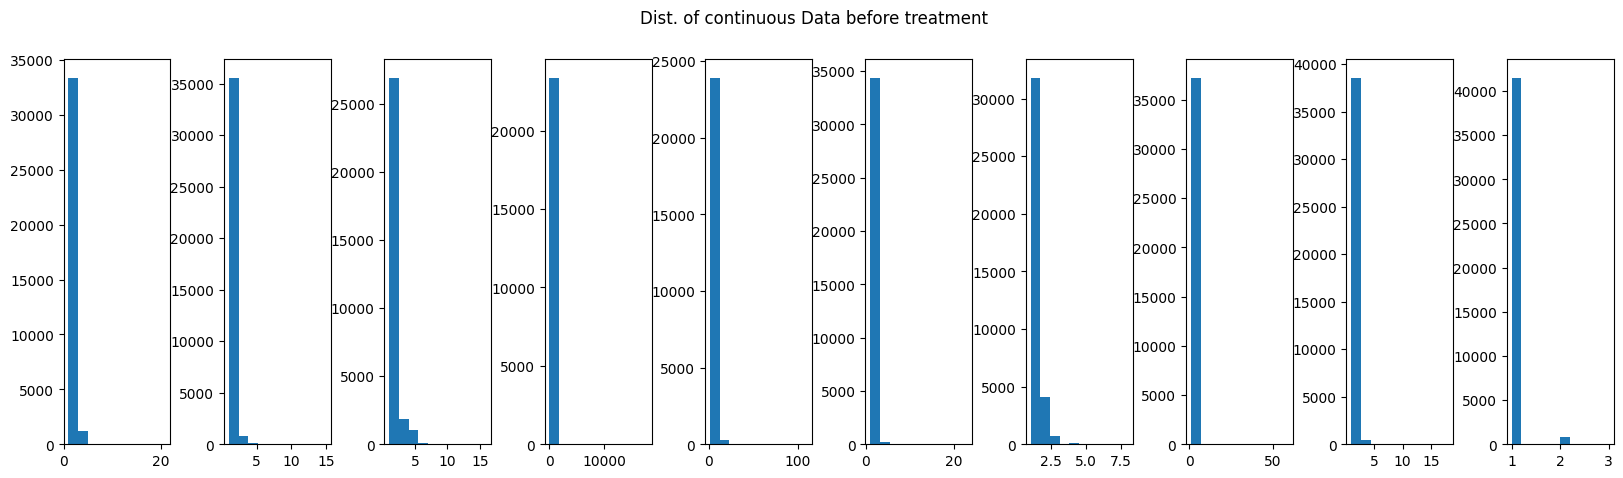

In [22]:
PlothistCharts(inpData=profitable, colsToPlot=num_cols)

__Observations__
   
   * From above histogram charts it is clear that all of the columns are mostly skewed and need to be checked if the skewness is due to outliers or not.

In [24]:
# profitable.skew()

* Above is the amount of skewness every numeric column contains and all of them are high.

In [25]:
#visualizing category columns
def PlotBarCharts(inpData, colsToPlot):

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of categorical cols')
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

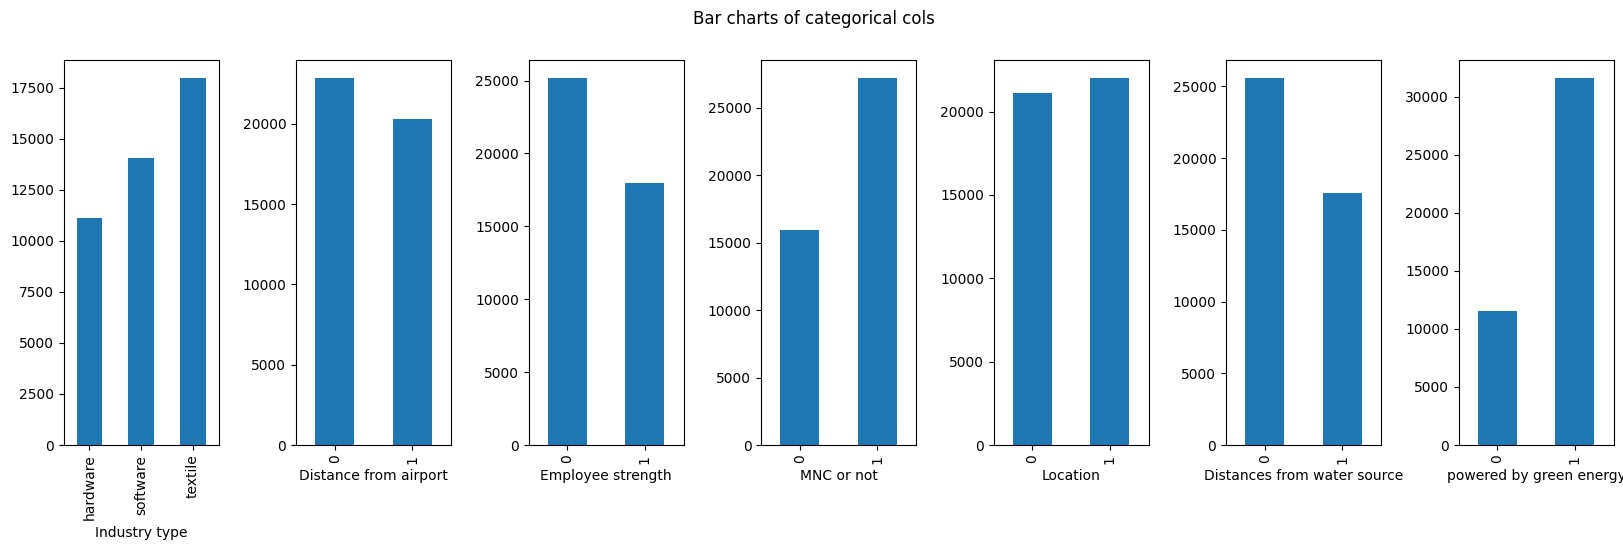

In [26]:
PlotBarCharts(inpData=profitable, colsToPlot=cat_cols)

__Observations__

   * From above bar charts it can be inferred that categorical features are mostly imbalanced in their classes. Final selection will be done after bivariate analysis.

* __Outlier Treatment__

  Outliers are treated using standard normalization i.e. conversion the data points of numeric columns into their respective z-score value and then eliminating values more than 3 or less than -3.

In [27]:
for col in num_cols:
    col_z_score = col + '_z_score'
    profitable[col_z_score] = (profitable[col]-profitable[col].mean())/profitable[col].std(ddof=0)

In [28]:
print(num_cols)

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation',
       'Equity vs Total liabilities', 'Altman score'],
      dtype='object')


<Axes: >

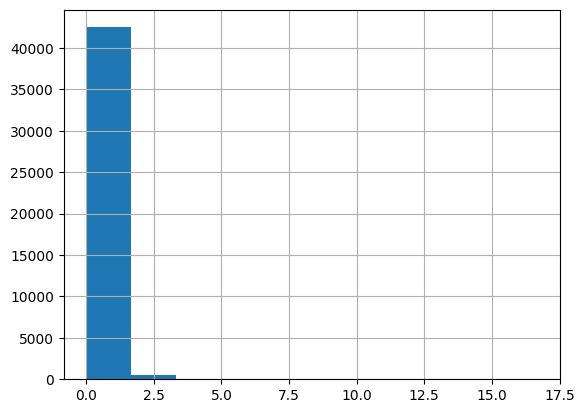

In [29]:
profitable['Total liabilities vs Total Assets'].hist()

In [30]:
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3].sort_values(ascending=False)

Series([], Name: Total liabilities vs Total Assets, dtype: float64)

In [31]:
profitable['Total liabilities vs Total Assets'].median()

0.47224

In [32]:
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']>3] = profitable['Total liabilities vs Total Assets'].median()
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3] = 0

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\3112636582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']>3] = profitable['Total liabilities vs Total Assets'].median()
C:\Users\himad\AppData\Local\Temp\ipykernel_24800\3112636582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3] = 0


<Axes: >

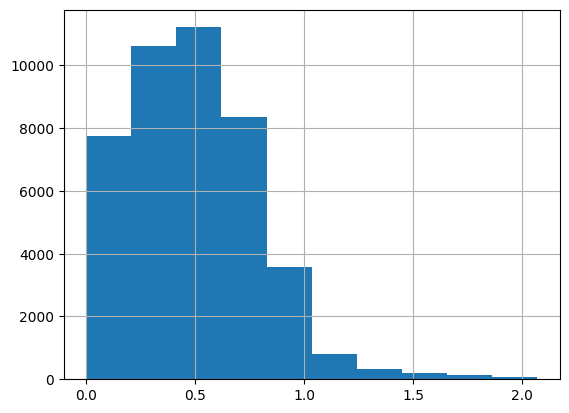

In [33]:
profitable['Total liabilities vs Total Assets'].hist()

<Axes: >

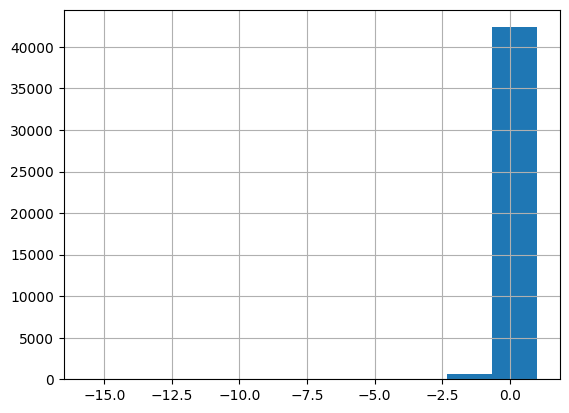

In [34]:
profitable['Working Capital vs total assets'].hist()

In [35]:
profitable['Working Capital vs total assets'][profitable['Working Capital vs total assets_z_score']<-3].sort_values(ascending=False)

26213    -1.2194
13185    -1.2328
23031    -1.2368
30961    -1.2382
32098    -1.2392
          ...   
12114   -14.4970
35479   -14.7180
37365   -14.9890
32962   -15.4870
18699   -15.6690
Name: Working Capital vs total assets, Length: 313, dtype: float64

In [36]:
profitable['Working Capital vs total assets'].median()

0.1963625

In [37]:
profitable['Working Capital vs total assets'][profitable['Working Capital vs total assets_z_score']<-3] = profitable['Working Capital vs total assets'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1860571011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Working Capital vs total assets'][profitable['Working Capital vs total assets_z_score']<-3] = profitable['Working Capital vs total assets'].median()


<Axes: >

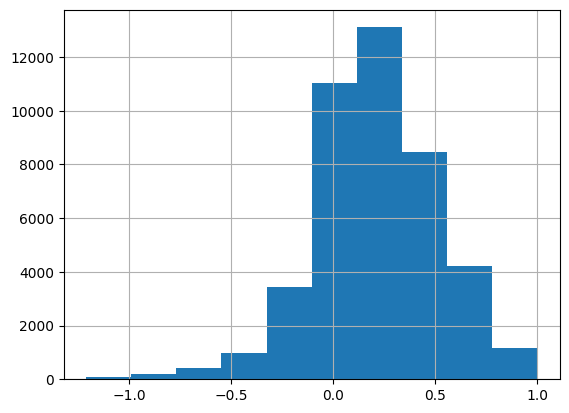

In [38]:
profitable['Working Capital vs total assets'].hist()

<Axes: >

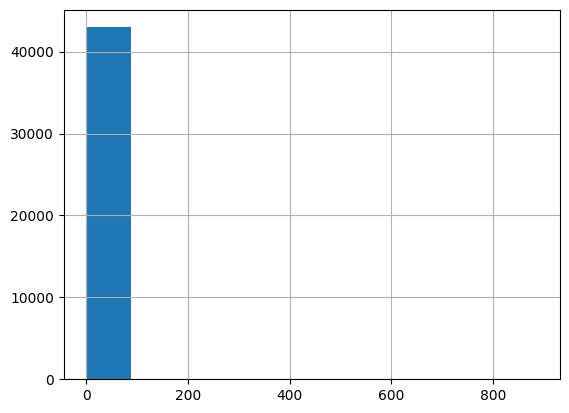

In [39]:
profitable['Current Assets vs short-term liabilities'].hist()

In [40]:
profitable['Current Assets vs short-term liabilities'][profitable['Current Assets vs short-term liabilities_z_score']>3].sort_values(ascending=False)

24474    886.690
32048    854.490
11092    841.760
41328    788.090
13188    782.250
          ...   
31271     60.630
30467     60.307
20423     60.257
35139     59.484
8575      59.197
Name: Current Assets vs short-term liabilities, Length: 206, dtype: float64

In [41]:
profitable['Current Assets vs short-term liabilities'].median()

1.5714

In [42]:
profitable['Current Assets vs short-term liabilities'][profitable['Current Assets vs short-term liabilities_z_score']>3] = profitable['Current Assets vs short-term liabilities'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\3813060540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Current Assets vs short-term liabilities'][profitable['Current Assets vs short-term liabilities_z_score']>3] = profitable['Current Assets vs short-term liabilities'].median()


<Axes: >

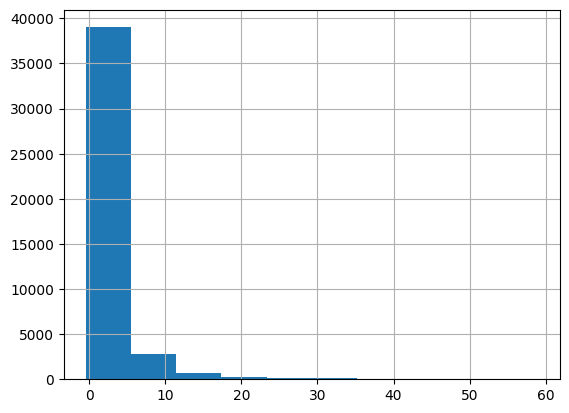

In [43]:
profitable['Current Assets vs short-term liabilities'].hist()

<Axes: >

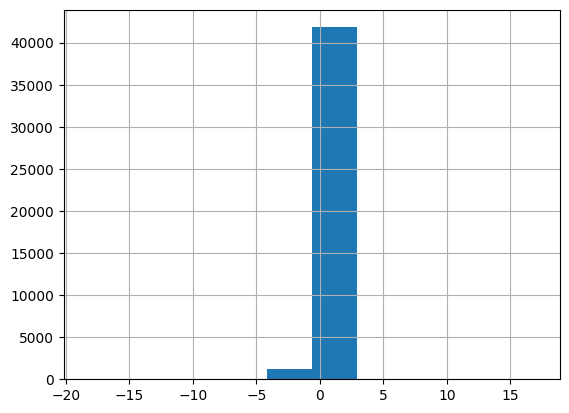

In [44]:
profitable['Retained earning vs total assets'].hist()

In [45]:
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']<-3].sort_values(ascending=False)

37363    -1.6485
5513     -1.6490
19874    -1.6509
26056    -1.6511
6648     -1.6521
          ...   
20459   -17.0610
8610    -17.3010
19683   -17.3960
37365   -18.0770
32704   -18.4130
Name: Retained earning vs total assets, Length: 469, dtype: float64

In [46]:
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']<-3] = profitable['Retained earning vs total assets'].median()
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']>3] =  profitable['Retained earning vs total assets'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1259345230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']<-3] = profitable['Retained earning vs total assets'].median()
C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1259345230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']>3] =  profitable['Retained earning vs total assets'].median()


<Axes: >

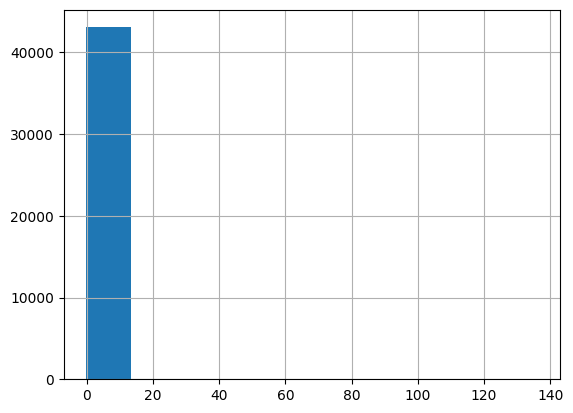

In [47]:
profitable['Sales vs total assets'].hist()

In [48]:
profitable['Sales vs total assets'][profitable['Sales vs total assets_z_score']>3].sort_values(ascending=False)

238      136.0500
37402     96.0580
514       71.5550
41846     65.6070
23999     63.4820
           ...   
5227       7.0662
5023       7.0627
5696       7.0607
14265      7.0606
6614       7.0584
Name: Sales vs total assets, Length: 492, dtype: float64

In [49]:
profitable['Sales vs total assets'][profitable['Sales vs total assets_z_score']>3] = profitable['Sales vs total assets'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1641989574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Sales vs total assets'][profitable['Sales vs total assets_z_score']>3] = profitable['Sales vs total assets'].median()


<Axes: >

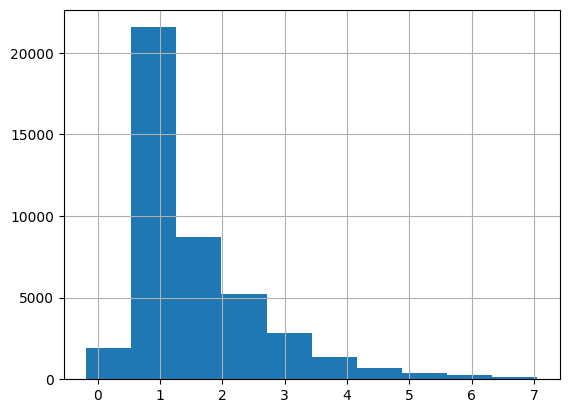

In [50]:
profitable['Sales vs total assets'].hist()

<Axes: >

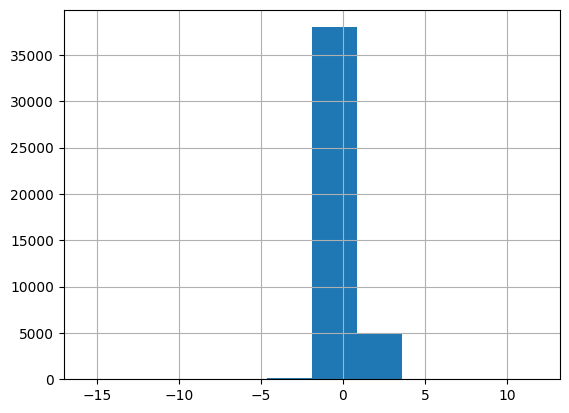

In [51]:
profitable['Equity vs total assets'].hist()

In [52]:
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']<-3].sort_values(ascending=False)

33038    -1.0981
6869     -1.1013
11292    -1.1050
43167    -1.1058
30961    -1.1163
          ...   
10220   -14.7620
20459   -14.9280
32962   -15.4870
24000   -15.6430
18699   -15.6670
Name: Equity vs total assets, Length: 404, dtype: float64

In [53]:
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']<-3] = profitable['Equity vs total assets'].median()
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']>3] = profitable['Equity vs total assets'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1395828647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']<-3] = profitable['Equity vs total assets'].median()
C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1395828647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']>3] = profitable['Equity vs total assets'].median()


<Axes: >

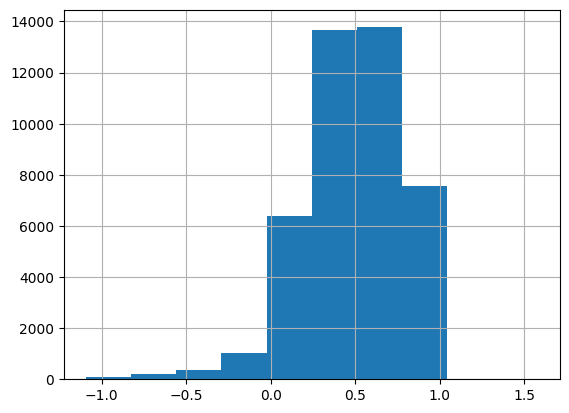

In [54]:
profitable['Equity vs total assets'].hist()

<Axes: >

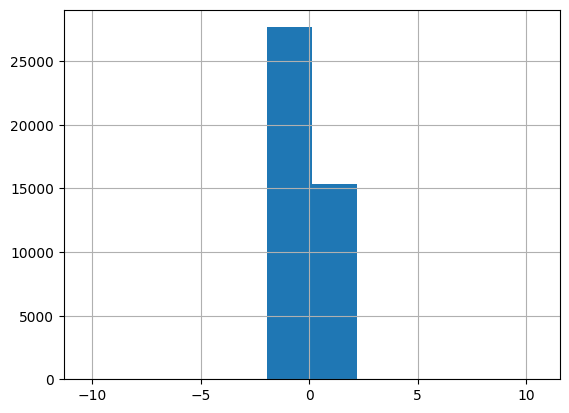

In [55]:
profitable['gf and interest vs total assets'].hist()

In [56]:
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3].sort_values(ascending=False)

22775    -0.76898
13241    -0.77080
16686    -0.77681
16900    -0.77748
28136    -0.77944
           ...   
36108    -9.29810
9599     -9.54990
27513    -9.74370
39167   -10.08300
40643   -10.29200
Name: gf and interest vs total assets, Length: 245, dtype: float64

In [57]:
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']>3] = profitable['gf and interest vs total assets'].median()
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3] = profitable['gf and interest vs total assets'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\197639504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']>3] = profitable['gf and interest vs total assets'].median()
C:\Users\himad\AppData\Local\Temp\ipykernel_24800\197639504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3] = profitable['gf and interest vs total assets'].median()


<Axes: >

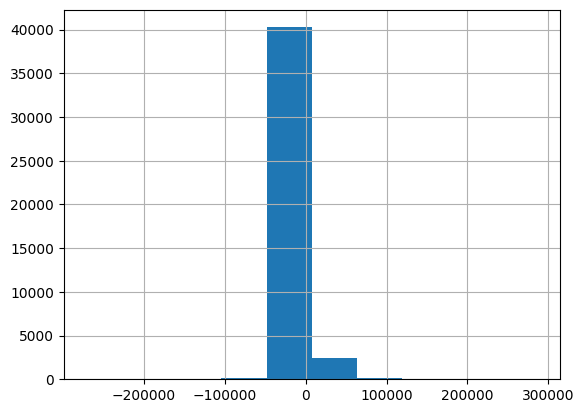

In [58]:
profitable['total liabilities vs gross profit and depriciation'].hist()

In [59]:
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']<-3].sort_values(ascending=False)

16380    -37998.0
23839    -38060.0
39236    -38067.0
15256    -38074.0
13930    -38130.0
           ...   
25733   -253030.0
35300   -253230.0
13317   -264620.0
24194   -269420.0
37988   -271440.0
Name: total liabilities vs gross profit and depriciation, Length: 243, dtype: float64

In [60]:
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']<-3] = profitable['total liabilities vs gross profit and depriciation'].median()
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']>3] = profitable['total liabilities vs gross profit and depriciation'].median()

C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1945182805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']<-3] = profitable['total liabilities vs gross profit and depriciation'].median()
C:\Users\himad\AppData\Local\Temp\ipykernel_24800\1945182805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']>3] = profitable['total liabilities vs gross 

In [61]:
def PlothistCharts(inpData, colsToPlot):

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle(f"Dist. of continuous Data After treatment")
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber]).set(ylabel=None)

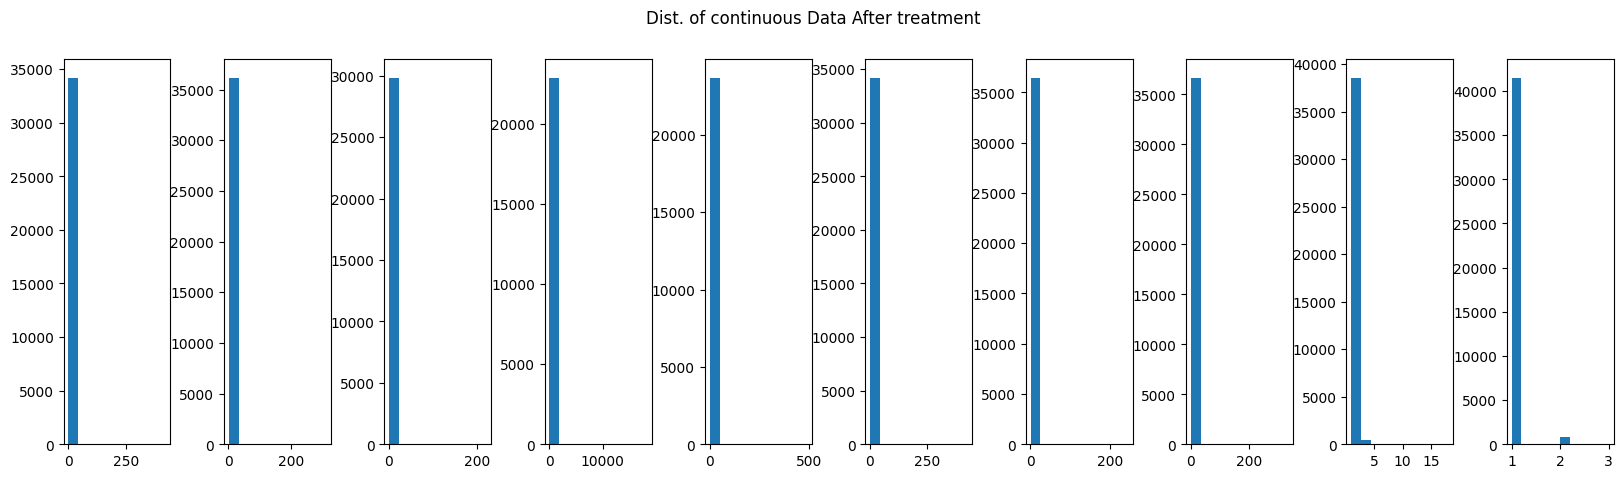

In [62]:
PlothistCharts(inpData=profitable, colsToPlot=num_cols)

In [63]:
# Deleting z-score columns as no longer needed
profitable.drop(['Total liabilities vs Total Assets_z_score',
       'Working Capital vs total assets_z_score',
       'Current Assets vs short-term liabilities_z_score',
       'Retained earning vs total assets_z_score',
       'Sales vs total assets_z_score', 'Equity vs total assets_z_score',
       'gf and interest vs total assets_z_score',
       'total liabilities vs gross profit and depriciation_z_score'],axis=1,inplace=True)

__Bi-Variate analysis__

  * To get an overview of how all predictors are behaving with respect to target column so that feature selection can be done

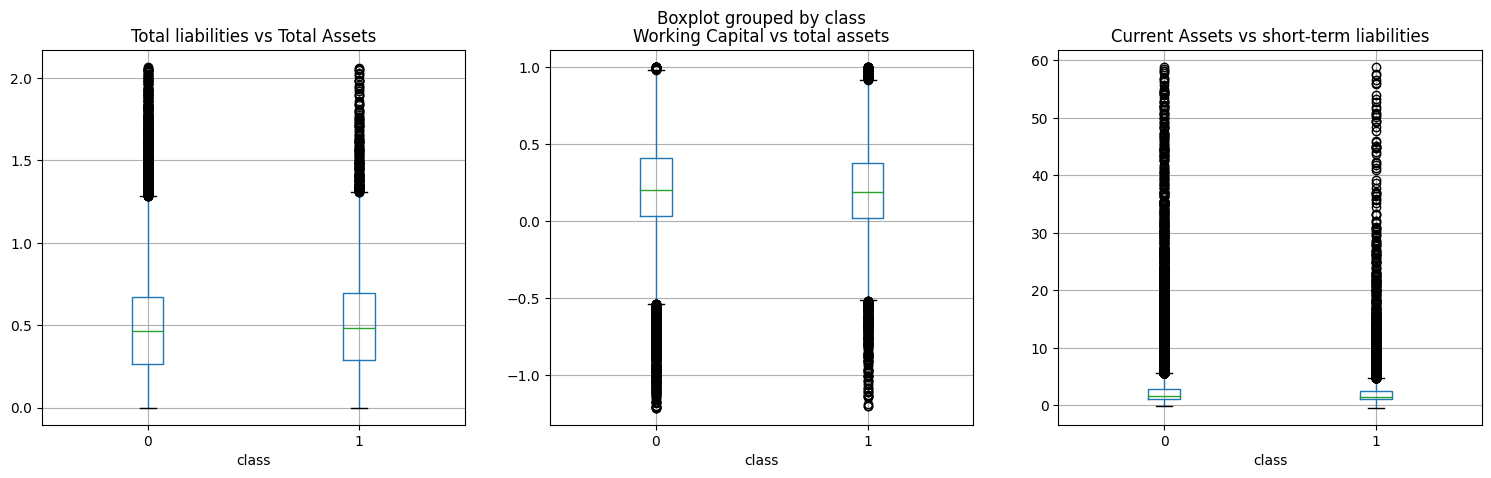

In [64]:
# Box plots for Categorical Target Variable "class" and continuous predictors
ContinuousColsList1 = ['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList1), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList1, range(len(ContinuousColsList1))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

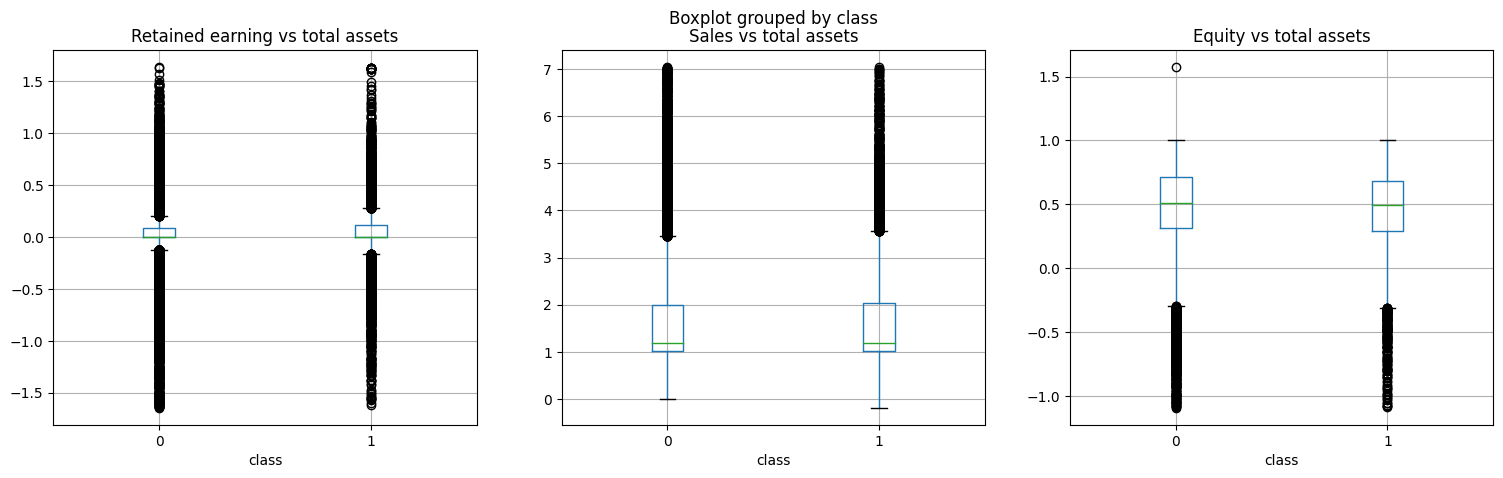

In [65]:
ContinuousColsList2 = ['Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList2), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList2, range(len(ContinuousColsList2))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

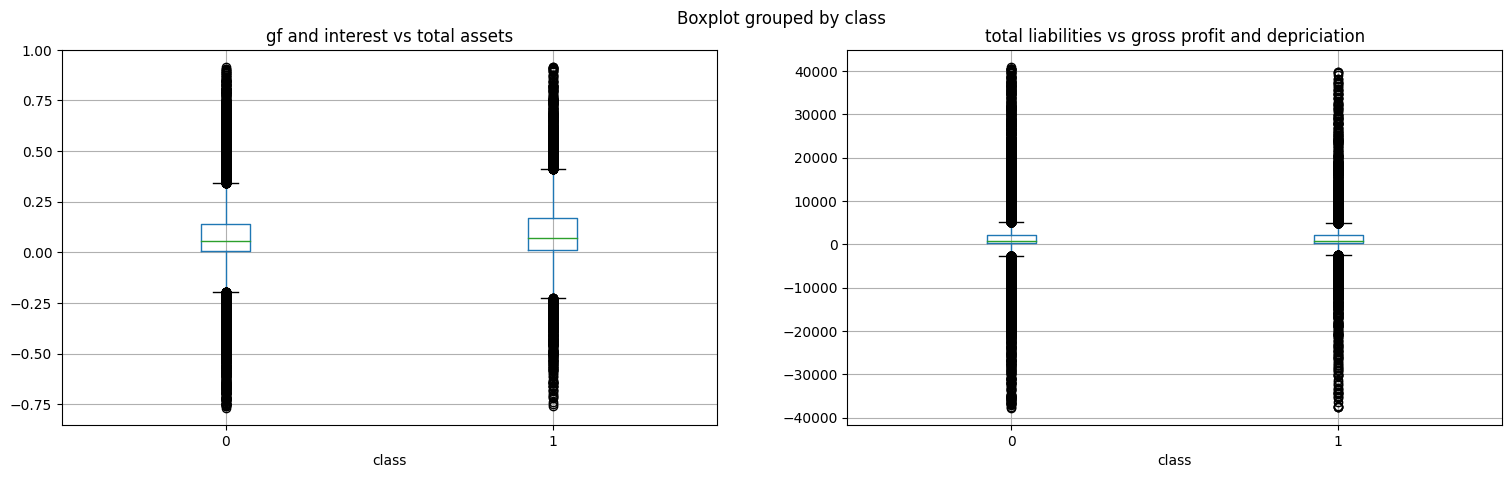

In [66]:
ContinuousColsList3 = ['gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList3), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList3, range(len(ContinuousColsList3))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

__Observations__
  * These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
  * Here all of the columns look almost similar in distribution hence cannot draw any insight from above plots. Need to look for statistical feature selection tests.

In [67]:
cat_cols

Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')

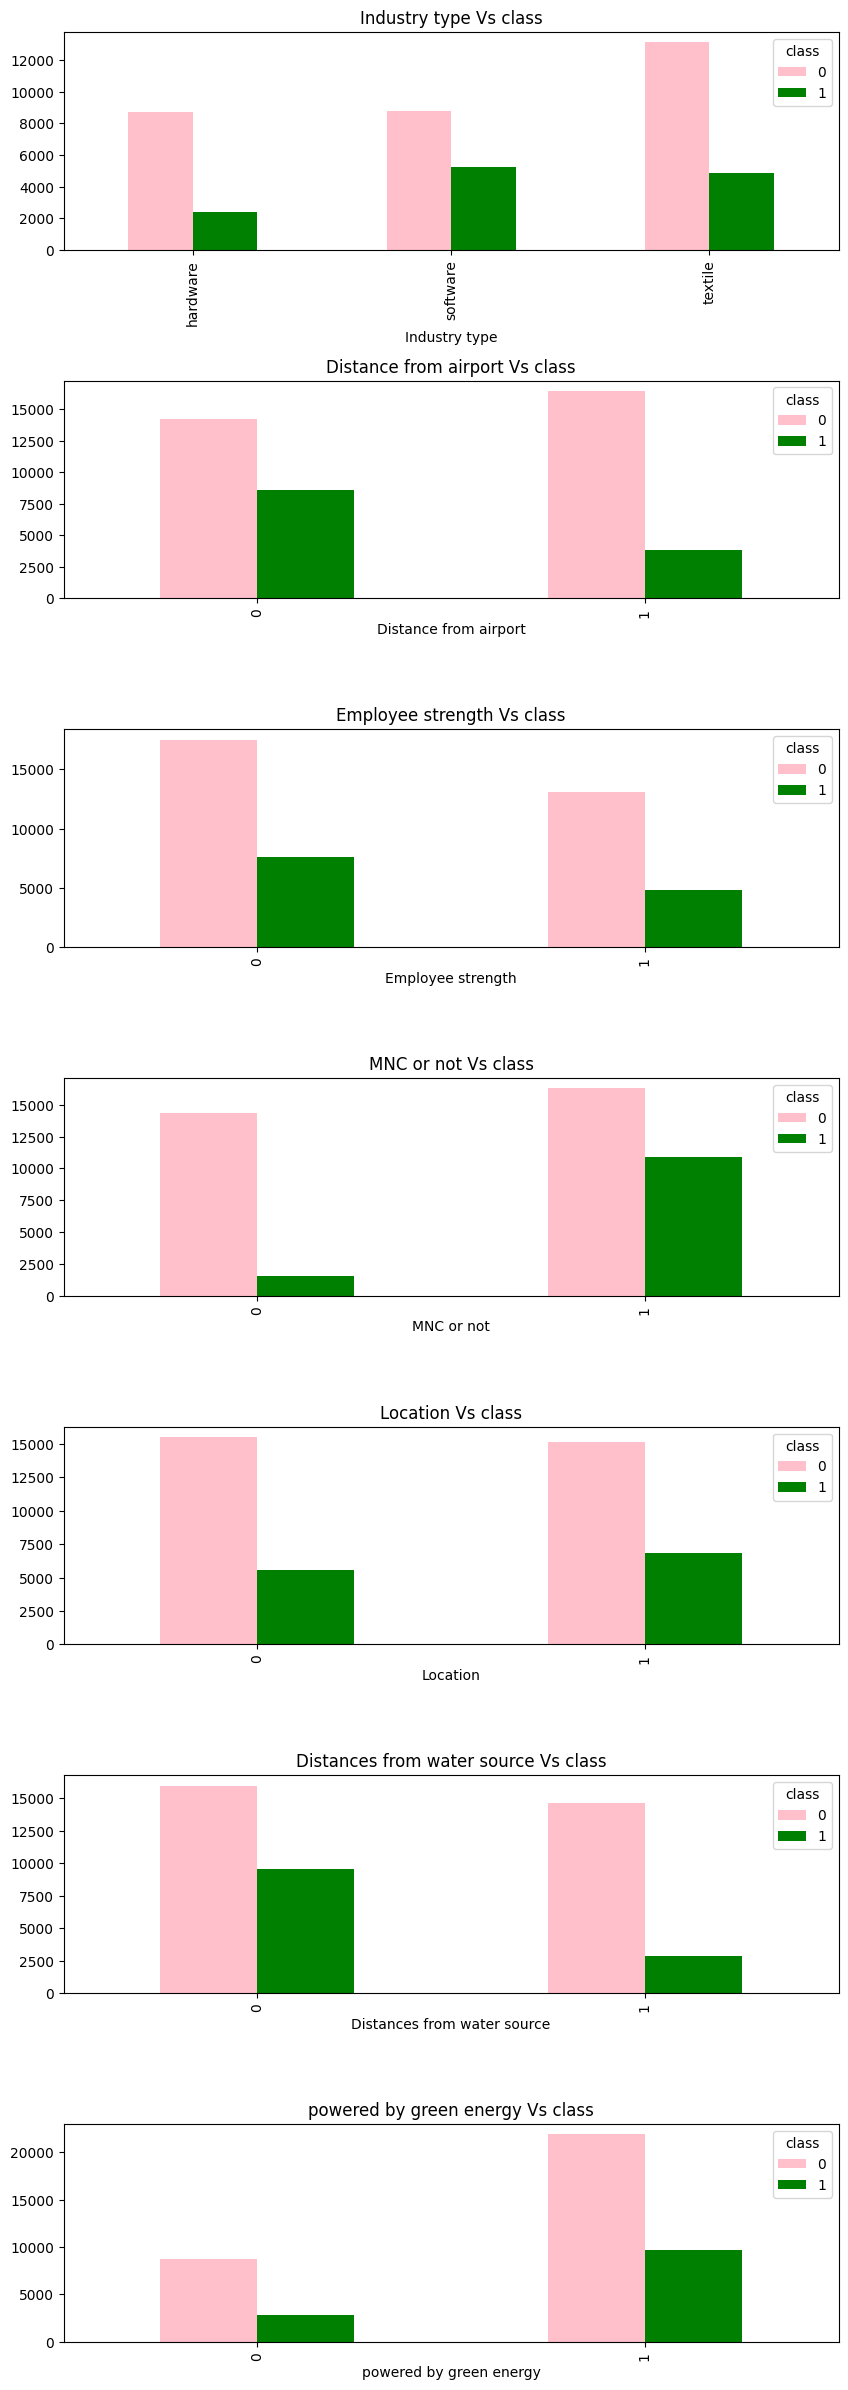

In [68]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=cat_cols

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating Grouped bar plots for each categorical predictor against the Target Variable "class"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=profitable[CategoricalCol], columns=profitable['class'])
    CrossTabResult.plot.bar(color=['pink','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'class')

__Observations__

 * These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

 * For example Industry type vs class plot. The bars are different for each category, Hence, two columns are correlated with each other.We confirm this analysis in below section by using Chi-Square Tests.

### Feature Engineering and Feature Selection


#### Feature Creation - Altman Score
* Altman’s Z-score model combines five financial ratios to predict the probability of a company becoming insolvent in the next two years.
* The formula takes into account  'Working Capital vs total assets','Retained earning vs total assets', 'Sales vs total assets',
  'Equity vs Total liabilities', 'gf and interest vs total assets'
* An Altman Z-score close to 1.8 suggests a company might be headed for bankruptcy, while a score closer to 3 suggests a company is in solid financial positioning.

In [70]:
# from IPython.display import Image
# Image(filename ='altman-z-score-model.png',width=750)

In [71]:
profitable['Equity vs Total liabilities'] = profitable['Equity vs total assets']/profitable['Total liabilities vs Total Assets']

In [72]:
profitable['Equity vs Total liabilities'] = np.where(profitable['Total liabilities vs Total Assets']==0,0,profitable['Equity vs Total liabilities'])

In [73]:
A = profitable['Working Capital vs total assets']
B = profitable['Retained earning vs total assets']
C = profitable['gf and interest vs total assets']
D = profitable['Equity vs Total liabilities']
E = profitable['Sales vs total assets']

In [74]:
profitable['Altman score'] = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

In [75]:
profitable.head()

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class,Equity vs Total liabilities,Altman score,Equity vs Total liabilities_z_score,Altman score_z_score
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1,0.249760,497.42,0,1.330505,3.780653,-0.021893,-0.019289
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1,0.258340,677.96,0,0.995999,3.716421,-0.022563,-0.019503
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1,0.309060,794.16,0,0.436947,2.911622,-0.023683,-0.022190
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1,0.092704,917.01,0,1.866109,3.243069,-0.020820,-0.021083
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1,0.187320,1133.20,1,0.630710,2.690250,-0.023294,-0.022929


In [76]:
profitable.groupby('Industry type')['Altman score'].median()

Industry type
hardware    3.000303
software    3.021139
textile     2.999308
Name: Altman score, dtype: float64

In [77]:
num_cols = ['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation','Equity vs Total liabilities','Altman score']

__Statistical feature selection__

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable).
* ANOVA Test result: Probability of H0 being true.

In [78]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [79]:
ContinuousVariables = num_cols
FunctionAnova(inpData=profitable, TargetVariable='class', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Total liabilities vs Total Assets is correlated with class | P-Value: 3.038111299382133e-11
Working Capital vs total assets is correlated with class | P-Value: 1.875119043352569e-12
Current Assets vs short-term liabilities is correlated with class | P-Value: 1.6982314328691436e-12
Retained earning vs total assets is correlated with class | P-Value: 1.4272672655041613e-08
Sales vs total assets is correlated with class | P-Value: 0.001670769253990643
Equity vs total assets is correlated with class | P-Value: 1.3568186942289763e-12
gf and interest vs total assets is correlated with class | P-Value: 6.335758398656519e-39
total liabilities vs gross profit and depriciation is NOT correlated with class | P-Value: 0.13774126680603913
Equity vs Total liabilities is NOT correlated with class | P-Value: 0.052982642356966904
Altman score is NOT correlated with class | P-Value: 0.05720902341218326


['Total liabilities vs Total Assets',
 'Working Capital vs total assets',
 'Current Assets vs short-term liabilities',
 'Retained earning vs total assets',
 'Sales vs total assets',
 'Equity vs total assets',
 'gf and interest vs total assets']

__Chi-Square test is conducted to check the correlation between two categorical variables__

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [80]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [81]:
CategoricalVariables = cat_cols

# Calling the function
FunctionChisq(inpData=profitable,
              TargetVariable='class',
              CategoricalVariablesList= CategoricalVariables)

Industry type is correlated with class | P-Value: 7.039841364783307e-183
Distance from airport is correlated with class | P-Value: 0.0
Employee strength is correlated with class | P-Value: 9.345625125640257e-15
MNC or not is correlated with class | P-Value: 0.0
Location is correlated with class | P-Value: 1.0175041769334928e-27
Distances from water source is correlated with class | P-Value: 0.0
powered by green energy is correlated with class | P-Value: 9.215482326522116e-39


['Industry type',
 'Distance from airport',
 'Employee strength',
 'MNC or not',
 'Location',
 'Distances from water source',
 'powered by green energy']

In [82]:
# Deleting non-correlated column from data
profitable = profitable.drop(['Equity vs Total liabilities','Altman score','total liabilities vs gross profit and depriciation'],axis=1)

#### Final selected predictors :
'Industry type', 'Total liabilities vs Total Assets',
       'Working Capital vs total assets',
       'Current Assets vs short-term liabilities', 'Distance from airport',
       'Retained earning vs total assets', 'Employee strength', 'MNC or not',
       'Sales vs total assets', 'Equity vs total assets', 'Location',
       'Distances from water source', 'powered by green energy',
       'gf and interest vs total assets'

### Train-Test Split
* Target attribute description

In [83]:
profitable['class'].value_counts()

class
0    30653
1    12461
Name: count, dtype: int64

In [84]:
profitable['class'].value_counts(normalize=True)*100

class
0    71.097555
1    28.902445
Name: proportion, dtype: float64

#### Split the model in train and test

In [85]:
X = profitable.drop('class', axis=1)
y = profitable['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#### Target attribute description after split

In [86]:
print(pd.value_counts(y_train)/y_train.count() * 100)

print(pd.value_counts(y_test) /y_test.count() * 100)

class
0    70.814142
1    29.185858
Name: count, dtype: float64
class
0    71.758794
1    28.241206
Name: count, dtype: float64


#### Convert categorical target attribute to numeric

In [87]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [88]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [89]:
y_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [90]:
y_train.size

30179

In [91]:
pd.value_counts(y_train)/y_train.size * 100

0    70.814142
1    29.185858
Name: count, dtype: float64

In [92]:
#checking data types
X_train.dtypes

Industry type                               category
Total liabilities vs Total Assets            float64
Working Capital vs total assets              float64
Current Assets vs short-term liabilities     float64
Distance from airport                       category
Retained earning vs total assets             float64
Employee strength                           category
MNC or not                                  category
Sales vs total assets                        float64
Equity vs total assets                       float64
Location                                    category
Distances from water source                 category
powered by green energy                     category
gf and interest vs total assets              float64
Equity vs Total liabilities_z_score          float64
Altman score_z_score                         float64
dtype: object

#### Standardize the numerical attributes

In [93]:
num_attr = X_train.select_dtypes(include=['float64', 'int64']).columns
num_attr

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'Equity vs Total liabilities_z_score', 'Altman score_z_score'],
      dtype='object')

#### Convert categorical attributes to numeric

In [94]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')

* Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [95]:
enc = OneHotEncoder()

enc.fit(X_train[cat_attr])

columns_ohe = list(enc.get_feature_names_out(cat_attr))
print(columns_ohe)

['Industry type_hardware', 'Industry type_software', 'Industry type_textile', 'Distance from airport_0', 'Distance from airport_1', 'Employee strength_0', 'Employee strength_1', 'MNC or not_0', 'MNC or not_1', 'Location_0', 'Location_1', 'Distances from water source_0', 'Distances from water source_1', 'powered by green energy_0', 'powered by green energy_1']


In [96]:
X_train_ohe =enc.transform(X_train[cat_attr])
X_test_ohe =enc.transform(X_test[cat_attr])

In [97]:
X_train_cat = pd.DataFrame(X_train_ohe.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_ohe.todense(), columns=columns_ohe)

#### Concatenate attribute
* Standardised numeric attributes and One hot encoded categorical attributes

In [98]:
X_train_num = pd.DataFrame(X_train[num_attr],columns=num_attr)
X_test_num = pd.DataFrame(X_test[num_attr],columns=num_attr)

In [99]:
X_train_num.isnull().sum()

Total liabilities vs Total Assets           0
Working Capital vs total assets             0
Current Assets vs short-term liabilities    0
Retained earning vs total assets            0
Sales vs total assets                       0
Equity vs total assets                      0
gf and interest vs total assets             0
Equity vs Total liabilities_z_score         0
Altman score_z_score                        0
dtype: int64

In [100]:
X_train_cat.shape

(30179, 15)

In [101]:
X_train_con = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_con = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

In [102]:
X_train_con

,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Retained earning vs total assets,Sales vs total assets,Equity vs total assets,gf and interest vs total assets,Equity vs Total liabilities_z_score,Altman score_z_score,Industry type_hardware,...,Employee strength_0,Employee strength_1,MNC or not_0,MNC or not_1,Location_0,Location_1,Distances from water source_0,Distances from water source_1,powered by green energy_0,powered by green energy_1
0,0.434110,-0.012130,0.97077,-0.445450,0.89561,0.565890,0.007208,-0.021947,-0.028360,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.958580,-0.235050,0.74953,-0.325670,1.00960,-0.057261,-0.033935,-0.024677,-0.031497,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.094982,0.494620,6.20750,0.000000,2.18120,0.905020,0.592110,-0.005472,0.002963,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.204240,0.237850,2.16460,0.000000,4.89860,0.795760,0.124250,-0.016754,-0.005430,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.628040,-0.088218,0.79401,0.173600,3.30450,0.371960,0.067279,-0.023371,-0.018493,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,0.171920,0.121870,1.95650,0.418730,1.26250,0.797500,0.226950,-0.015266,-0.013458,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
30175,1.025900,0.195750,2.01000,0.000000,1.27120,-0.025882,-0.666760,-0.024608,-0.034278,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30176,0.523440,-0.102460,0.66978,0.241330,1.09860,0.449730,0.041528,-0.022837,-0.025347,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30177,0.859400,0.145950,1.19910,0.042677,2.21540,0.140600,-0.034003,-0.024230,-0.023777,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [103]:
X_train_con.isnull().sum()

Total liabilities vs Total Assets           0
Working Capital vs total assets             0
Current Assets vs short-term liabilities    0
Retained earning vs total assets            0
Sales vs total assets                       0
Equity vs total assets                      0
gf and interest vs total assets             0
Equity vs Total liabilities_z_score         0
Altman score_z_score                        0
Industry type_hardware                      0
Industry type_software                      0
Industry type_textile                       0
Distance from airport_0                     0
Distance from airport_1                     0
Employee strength_0                         0
Employee strength_1                         0
MNC or not_0                                0
MNC or not_1                                0
Location_0                                  0
Location_1                                  0
Distances from water source_0               0
Distances from water source_1     

#### Defining Error Metrics

In [104]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [105]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print ( '''
            =========================================
                      CONFUSION MATRIX for TRAIN
            =========================================
            '''
          )
    print(confusion_matrix(y_train, train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))
    print ( '''
            =========================================
                      CONFUSION MATRIX for TEST
            =========================================
            '''
          )
    print(confusion_matrix(y_test, test_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

## Model building

#### Logistic Regression model

In [106]:
logreg = LogisticRegression()

In [107]:
logreg.fit(X_train_con, y_train)

C:\Users\himad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predict

In [108]:
train_pred = logreg.predict(X_train_con)
test_pred = logreg.predict(X_test_con)

#### Evaluate

In [109]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21304    67]
 [ 3438  5370]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8610    0.9969    0.9240     21371
           1     0.9877    0.6097    0.7539      8808

    accuracy                         0.8839     30179
   macro avg     0.9244    0.8033    0.8390     30179
weighted avg     0.8980    0.8839    0.8744     30179


                      CONFUSION MATRIX for TEST
            
[[9253   29]
 [1490 2163]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8613    0.9969    0.9241      9282
           1     0.9868    0.5921    0.7401      3653

    accuracy                         0.8826     12935
   macro avg     0.9240    0.7945    0.8321     12935
weighted avg     0.8967    0.8826    0.8722     12935



In [110]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"LogReg",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__
* Above we can see the baseline Logistic regression model with both train and test accuracy of 88%, precision score of 89.6% and f1-score as 87% hence it is a regular fit model.

#### KNN classification

In [111]:
knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train_con,y_train)

KNeighborsClassifier(metric='euclidean')

In [112]:
train_pred = knn.predict(X_train_con)
test_pred = knn.predict(X_test_con)

In [113]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[20887   484]
 [ 2400  6408]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8969    0.9774    0.9354     21371
           1     0.9298    0.7275    0.8163      8808

    accuracy                         0.9044     30179
   macro avg     0.9134    0.8524    0.8759     30179
weighted avg     0.9065    0.9044    0.9007     30179


                      CONFUSION MATRIX for TEST
            
[[8890  392]
 [1260 2393]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8759    0.9578    0.9150      9282
           1     0.8592    0.6551    0.7434      3653

    accuracy                         0.8723     12935
   macro avg     0.8676    0.8064    0.8292     12935
weighted avg     0.8712    0.8723    0.8665     12935



In [114]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"KNN",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

#### Observations:
* Model seems lower in performance than previous one with respectto its train and test accuracy. Also, precision is not as per the logistic regression. Hence need improvement.

#### KNN best parameters

In [115]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [116]:
parameters = {'n_neighbors':list(range(2,12))}

KNN_bestparams = HalvingGridSearchCV(KNeighborsClassifier(),
                   parameters,verbose=1, cv=5)

KNN_bestparams.fit(X=X_train_con, y=y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3353
max_resources_: 30179
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 3353
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 10059
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 30177
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11]},
                    verbose=1)

In [117]:
knn_best_model = KNN_bestparams.best_estimator_
knn_best_model

KNeighborsClassifier(n_neighbors=6)

In [118]:
print (KNN_bestparams.best_score_, KNN_bestparams.best_params_)

0.8838403534349265 {'n_neighbors': 6}


In [119]:
train_pred = knn_best_model.predict(X_train_con)
test_pred = knn_best_model.predict(X_test_con)

In [120]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21142   229]
 [ 2827  5981]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8821    0.9893    0.9326     21371
           1     0.9631    0.6790    0.7965      8808

    accuracy                         0.8987     30179
   macro avg     0.9226    0.8342    0.8646     30179
weighted avg     0.9057    0.8987    0.8929     30179


                      CONFUSION MATRIX for TEST
            
[[9102  180]
 [1345 2308]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8713    0.9806    0.9227      9282
           1     0.9277    0.6318    0.7517      3653

    accuracy                         0.8821     12935
   macro avg     0.8995    0.8062    0.8372     12935
weighted avg     0.8872    0.8821    0.8744     12935



In [121]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"KNNbestparams",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__
* After hyperparameter tuning,the KNN model got improved with a better train-test accuracy compared to earlier version. Also, both test precision and f1-score improved. Therefore it can be a better fit model.

#### Decision Trees

In [122]:
dt = DecisionTreeClassifier(max_depth=4)

In [123]:
dt.fit(X_train_con, y_train)

DecisionTreeClassifier(max_depth=4)

In [124]:
train_pred = dt.predict(X_train_con)
test_pred = dt.predict(X_test_con)

In [125]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21310    61]
 [ 3162  5646]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8708    0.9971    0.9297     21371
           1     0.9893    0.6410    0.7780      8808

    accuracy                         0.8932     30179
   macro avg     0.9301    0.8191    0.8538     30179
weighted avg     0.9054    0.8932    0.8854     30179


                      CONFUSION MATRIX for TEST
            
[[9257   25]
 [1375 2278]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8707    0.9973    0.9297      9282
           1     0.9891    0.6236    0.7649      3653

    accuracy                         0.8918     12935
   macro avg     0.9299    0.8105    0.8473     12935
weighted avg     0.9041    0.8918    0.8832     12935



In [126]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"DecisionTrees",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__
* Decision tree is giving a better fitness on both train and validation data compared to KNN model.

#### Random Forest Classifier

In [127]:
clf_rf = RandomForestClassifier()

In [128]:
clf_rf.fit(X_train_con, y_train)

RandomForestClassifier()

In [129]:
train_pred = clf_rf.predict(X_train_con)
test_pred = clf_rf.predict(X_test_con)

In [130]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21370     1]
 [    9  8799]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     21371
           1     0.9999    0.9990    0.9994      8808

    accuracy                         0.9997     30179
   macro avg     0.9997    0.9995    0.9996     30179
weighted avg     0.9997    0.9997    0.9997     30179


                      CONFUSION MATRIX for TEST
            
[[9080  202]
 [1251 2402]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8789    0.9782    0.9259      9282
           1     0.9224    0.6575    0.7678      3653

    accuracy                         0.8877     12935
   macro avg     0.9007    0.8179    0.8468     12935
weighted avg     0.8912    0.8877    0.8813     12935



In [131]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"RandomForest",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__
* Random forest is overfitting the prediction output hence upsampling will be done.

#### Upsampling to tackle target attribute's class imbalance

In [132]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\himad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
smote = SMOTE(random_state=123)

In [135]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [136]:
clf_rf_upsample = RandomForestClassifier()

In [137]:
clf_rf_upsample.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [138]:
train_pred = clf_rf_upsample.predict(X_train_sm)
test_pred = clf_rf_upsample.predict(X_test_con)

In [139]:
classifcation_report_train_test(y_train_sm,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21369     2]
 [    8 21363]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     21371
           1     0.9999    0.9996    0.9998     21371

    accuracy                         0.9998     42742
   macro avg     0.9998    0.9998    0.9998     42742
weighted avg     0.9998    0.9998    0.9998     42742


                      CONFUSION MATRIX for TEST
            
[[8736  546]
 [1074 2579]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8905    0.9412    0.9151      9282
           1     0.8253    0.7060    0.7610      3653

    accuracy                         0.8748     12935
   macro avg     0.8579    0.8236    0.8381     12935
weighted avg     0.8721    0.8748    0.8716     12935



In [140]:
scores = get_metrics(y_train_sm,train_pred,y_test,test_pred,"RFupsampling",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__

* Upsampling did not work for handling overfitting of model in Random Forest.

#### Random Forest best parameters

In [141]:
param_grid = {"n_estimators" : [50, 100,200],
              "max_depth" : [1,5,10],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4]}

In [142]:
rfc_grid = RandomForestClassifier()

In [143]:
rfc_grid_cv = HalvingGridSearchCV(rfc_grid, param_grid, cv=2)

In [144]:
rfc_grid_cv.fit(X_train_con, y_train)

HalvingGridSearchCV(cv=2, estimator=RandomForestClassifier(),
                    param_grid={'max_depth': [1, 5, 10], 'max_features': [3, 5],
                                'min_samples_leaf': [1, 2, 4],
                                'n_estimators': [50, 100, 200]})

In [145]:
rfc_grid_best = rfc_grid_cv.best_estimator_
rfc_grid_best

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=2,
                       n_estimators=200)

In [146]:
train_pred = rfc_grid_best.predict(X_train_con)
test_pred = rfc_grid_best.predict(X_test_con)

In [147]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN
            
[[21286    85]
 [ 3086  5722]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8734    0.9960    0.9307     21371
           1     0.9854    0.6496    0.7830      8808

    accuracy                         0.8949     30179
   macro avg     0.9294    0.8228    0.8569     30179
weighted avg     0.9061    0.8949    0.8876     30179


                      CONFUSION MATRIX for TEST
            
[[9241   41]
 [1360 2293]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8717    0.9956    0.9295      9282
           1     0.9824    0.6277    0.7660      3653

    accuracy                         0.8917     12935
   macro avg     0.9271    0.8116    0.8478     12935
weighted avg     0.9030    0.8917    0.8834     12935



In [148]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"RFbestparams",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

In [149]:
print (rfc_grid_best)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=2,
                       n_estimators=200)


In [150]:
importances = rfc_grid_best.feature_importances_
indices = np.argsort(importances)
print(indices)

[15 14 11 23  1 22  2  0  5  7  4  3  8  9  6 10 18 19 20 21 12 13 17 16]


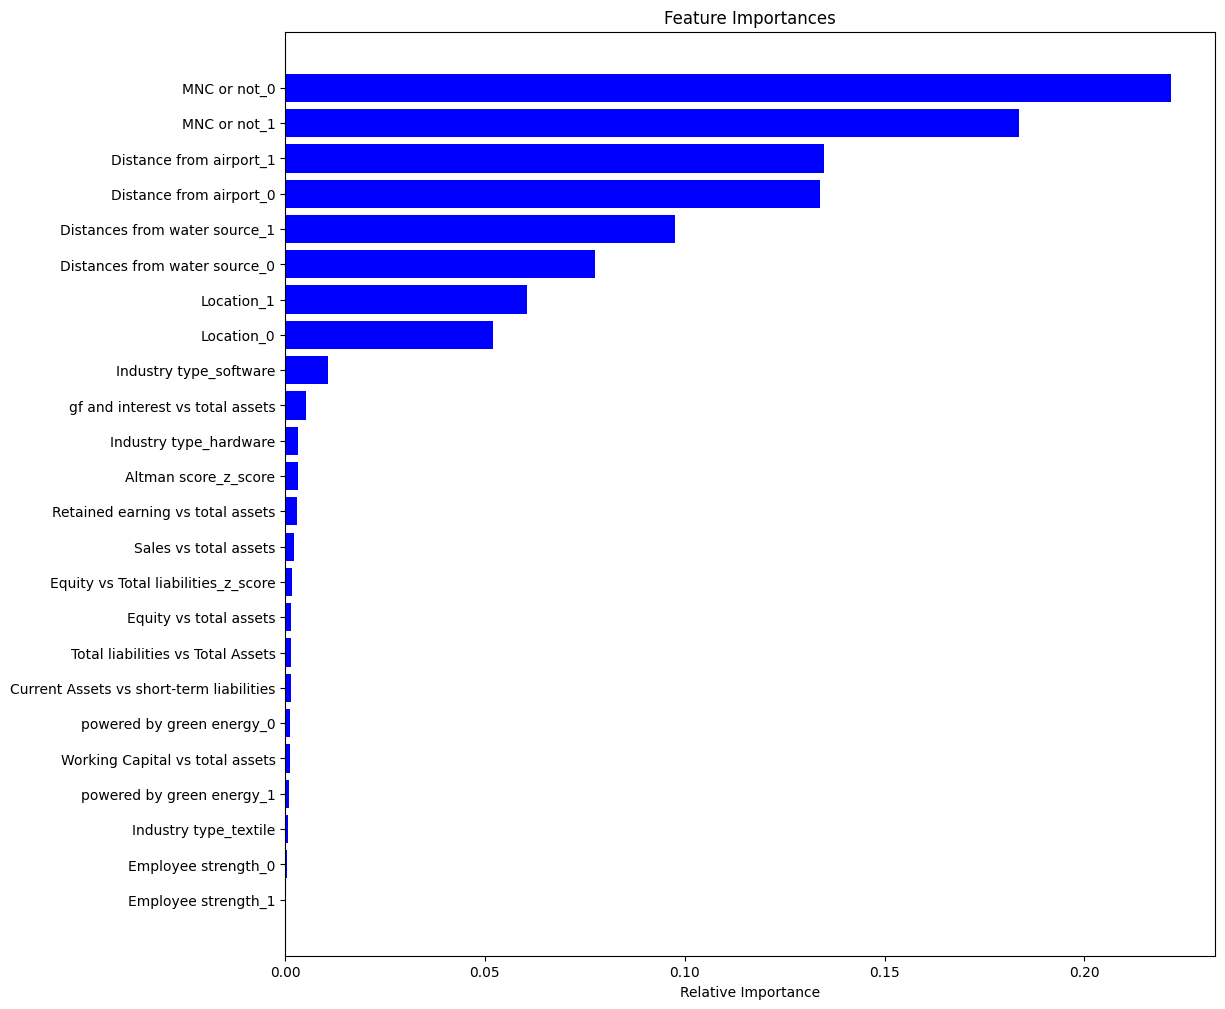

In [151]:
%matplotlib inline
features = X_train_con.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

__Observations:__
* Model's performance got improved after tuning hyperparameters of Random Forest in terms of all evaluation metrics.

#### AdaBoost

In [152]:
clf_adaboost =  AdaBoostClassifier(n_estimators = 500,
    learning_rate = 0.5)

In [153]:
clf_adaboost.fit(X_train_con, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

In [154]:
y_pred_train = clf_adaboost.predict(X_train_con)
y_pred_test = clf_adaboost.predict(X_test_con)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8845554856025714
Test Accuracy: 0.8812524159257827


In [155]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


                      CONFUSION MATRIX for TRAIN
            
[[21286    85]
 [ 3086  5722]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8645    0.9926    0.9241     21371
           1     0.9720    0.6224    0.7589      8808

    accuracy                         0.8846     30179
   macro avg     0.9182    0.8075    0.8415     30179
weighted avg     0.8958    0.8846    0.8759     30179


                      CONFUSION MATRIX for TEST
            
[[9241   41]
 [1360 2293]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8630    0.9919    0.9230      9282
           1     0.9669    0.6001    0.7405      3653

    accuracy                         0.8813     12935
   macro avg     0.9150    0.7960    0.8318     12935
weighted avg     0.8924    0.8813    0.8715     12935



In [156]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

__Observations:__

* Performance is not as good as previous model but can be considered a regular fit model.

#### Adaboost with hyperparameters

In [157]:
param_grid = {'n_estimators' : [50, 100, 500],
              'learning_rate' : [0.3, 0.5, 1]}

Adaboost_param = HalvingGridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [158]:
%time Adaboost_param.fit(X_train_con, y_train)

CPU times: total: 7.73 s
Wall time: 1min


HalvingGridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2)),
                    n_jobs=-1,
                    param_grid={'learning_rate': [0.3, 0.5, 1],
                                'n_estimators': [50, 100, 500]})

In [159]:
best_ada_model = Adaboost_param.best_estimator_
print (Adaboost_param.best_score_, Adaboost_param.best_params_)

0.8852323549595649 {'learning_rate': 0.3, 'n_estimators': 50}


In [160]:
best_ada_model

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.3)

In [161]:
y_pred_train = best_ada_model.predict(X_train_con)
y_pred_test = best_ada_model.predict(X_test_con)

In [162]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


                      CONFUSION MATRIX for TRAIN
            
[[21286    85]
 [ 3086  5722]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8701    0.9886    0.9256     21371
           1     0.9586    0.6419    0.7689      8808

    accuracy                         0.8874     30179
   macro avg     0.9144    0.8152    0.8473     30179
weighted avg     0.8959    0.8874    0.8799     30179


                      CONFUSION MATRIX for TEST
            
[[9241   41]
 [1360 2293]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8682    0.9886    0.9245      9282
           1     0.9552    0.6187    0.7510      3653

    accuracy                         0.8841     12935
   macro avg     0.9117    0.8036    0.8377     12935
weighted avg     0.8928    0.8841    0.8755     12935



In [163]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost_BestParameters",scores)
scores

AttributeError: 'DataFrame' object has no attribute 'append'

In [164]:
importances = best_ada_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[11 15 14  0  9  5 22 23 21 13 10  8 16 18  7  1  2 12 17 20 19  4  6  3]


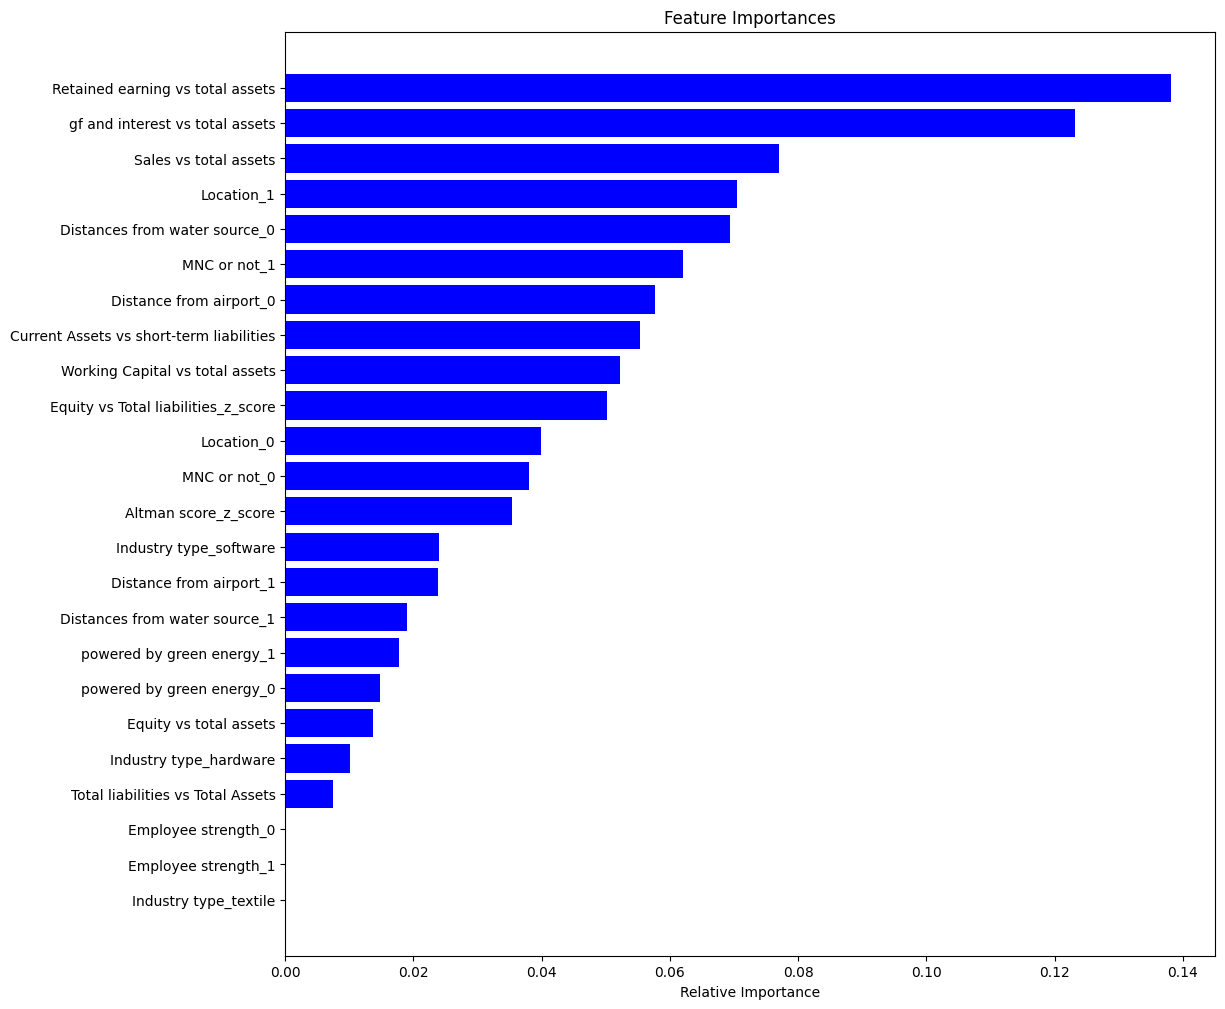

In [165]:
%matplotlib inline
features = X_train_con.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

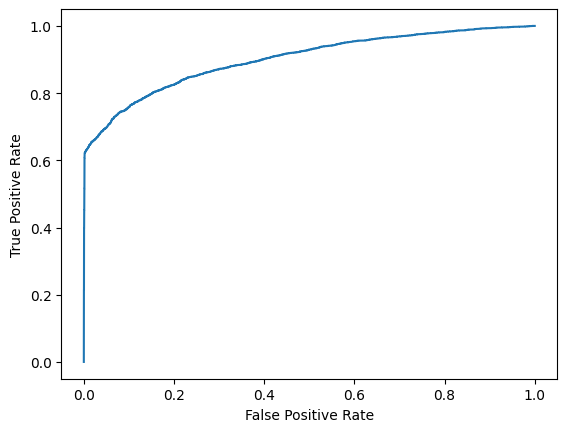

AUC= 0.901


In [166]:
# ROC-AUC curve for best fit model
from sklearn import metrics
prediction_proba = rfc_grid_best.predict_proba(X_test_con)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prediction_proba)
auc = metrics.roc_auc_score(y_test, prediction_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC=",round(auc,3))

__Observations:__
* After hyperparameter tuning Adaboost is showing better performance than its previous version. Therefore Adaboost and Decision tree are successors of Random Forest and can also be under consideration for accurate prediction.
* From above ROC-AUC curve it can be inferred that, this predictive model(Random Forest) is a pretty good performer and able to distinguish between True positive and Fall positives efficiently.

In [167]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(best_ada_model, f)